# import libraries

In [1120]:
import pandas as pd 
import matplotlib.pyplot as plt               
import keras
from keras.layers import Dense    #for Dense layers
from keras.layers import BatchNormalization #for batch normalization
from keras.layers import Dropout            #for random dropout
from keras.models import Sequential #for sequential implementation
from keras.optimizers import Adam   #for adam optimizer
from keras import regularizers      #for l2 regularization
import numpy as np


# read dataset

In [1121]:
df=pd.read_csv("E:/FCIH-level 4/Selected 1/project/dataset/adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,NaN,NaN,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,NaN,Married-civ-spouse,Farming-fishing,Husband,White,Male,NaN,NaN,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,NaN,NaN,40.0,United-States,>50K
3,44,Private,160323,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,NaN,40.0,United-States,>50K
4,18,NaN,103497,Some-college,10.0,Never-married,NaN,Own-child,White,Female,NaN,NaN,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,NaN,NaN,38.0,United-States,<=50K
48838,40,Private,154374,HS-grad,NaN,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,NaN,NaN,40.0,United-States,>50K
48839,58,Private,151910,HS-grad,NaN,Widowed,Adm-clerical,Unmarried,White,Female,NaN,NaN,40.0,United-States,<=50K
48840,22,Private,201490,HS-grad,NaN,Never-married,Adm-clerical,Own-child,White,Male,NaN,NaN,20.0,United-States,<=50K


In [1122]:
df.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
educational-num    float64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [1123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        46043 non-null  object 
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  object 
 4   educational-num  26650 non-null  float64
 5   marital-status   48842 non-null  object 
 6   occupation       46033 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     4035 non-null   float64
 11  capital-loss     2282 non-null   float64
 12  hours-per-week   48142 non-null  float64
 13  native-country   47985 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


# handling with null values

In [1124]:
df['capital-gain' ].unique()

array([   nan,  7688.,  3103.,  6418.,  7298.,  3908., 14084.,  5178.,
       15024., 99999.,  2597.,  2907.,  4650.,  6497.,  1055.,  5013.,
       27828.,  4934.,  4064.,  3674.,  2174., 10605.,  3418.,   114.,
        2580.,  3411.,  4508.,  4386.,  8614., 13550.,  6849.,  2463.,
        3137.,  2885.,  2964.,  1471., 10566.,  2354.,  1424.,  1455.,
        3325.,  4416., 25236.,   594.,  2105.,  4787.,  2829.,   401.,
        4865.,  1264.,  1506., 10520.,  3464.,  2653., 20051.,  4101.,
        1797.,  2407.,  3471.,  1086.,  1848., 14344.,  1151.,  2993.,
        2290., 15020.,  9386.,  2202.,  3818.,  2176.,  5455., 11678.,
        7978.,  7262.,  6514., 41310.,  3456.,  7430.,  2414.,  2062.,
       34095.,  1831.,  6723.,  5060., 15831.,  2977.,  2346.,  3273.,
        2329.,  9562.,  2635.,  4931.,  1731.,  6097.,   914.,  7896.,
        5556.,  1409.,  3781.,  3942.,  2538.,  3887., 25124.,  7443.,
        5721.,  1173.,  4687.,  6612.,  6767.,  2961.,   991.,  2036.,
      

In [1125]:
df['capital-gain' ].fillna(value = 0,inplace = True)

In [1126]:
df['capital-gain' ].unique()

array([    0.,  7688.,  3103.,  6418.,  7298.,  3908., 14084.,  5178.,
       15024., 99999.,  2597.,  2907.,  4650.,  6497.,  1055.,  5013.,
       27828.,  4934.,  4064.,  3674.,  2174., 10605.,  3418.,   114.,
        2580.,  3411.,  4508.,  4386.,  8614., 13550.,  6849.,  2463.,
        3137.,  2885.,  2964.,  1471., 10566.,  2354.,  1424.,  1455.,
        3325.,  4416., 25236.,   594.,  2105.,  4787.,  2829.,   401.,
        4865.,  1264.,  1506., 10520.,  3464.,  2653., 20051.,  4101.,
        1797.,  2407.,  3471.,  1086.,  1848., 14344.,  1151.,  2993.,
        2290., 15020.,  9386.,  2202.,  3818.,  2176.,  5455., 11678.,
        7978.,  7262.,  6514., 41310.,  3456.,  7430.,  2414.,  2062.,
       34095.,  1831.,  6723.,  5060., 15831.,  2977.,  2346.,  3273.,
        2329.,  9562.,  2635.,  4931.,  1731.,  6097.,   914.,  7896.,
        5556.,  1409.,  3781.,  3942.,  2538.,  3887., 25124.,  7443.,
        5721.,  1173.,  4687.,  6612.,  6767.,  2961.,   991.,  2036.,
      

In [1127]:
df['capital-loss' ].fillna(value = 0,inplace = True)

In [1128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        46043 non-null  object 
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  object 
 4   educational-num  26650 non-null  float64
 5   marital-status   48842 non-null  object 
 6   occupation       46033 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48142 non-null  float64
 13  native-country   47985 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


In [1129]:
df['native-country' ].fillna(value = 0,inplace = True)

In [1130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        46043 non-null  object 
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  object 
 4   educational-num  26650 non-null  float64
 5   marital-status   48842 non-null  object 
 6   occupation       46033 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48142 non-null  float64
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


In [1131]:
df['hours-per-week' ].fillna(value = 0,inplace = True)

In [1132]:
df['occupation' ].fillna(value = 0,inplace = True)

In [1133]:
df['educational-num' ].fillna(value = 0,inplace = True)

In [1134]:
df['workclass' ].fillna(value = 0,inplace = True)

In [1135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  int64  
 1   workclass        48842 non-null  object 
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  float64
 5   marital-status   48842 non-null  object 
 6   occupation       48842 non-null  object 
 7   relationship     48842 non-null  object 
 8   race             48842 non-null  object 
 9   gender           48842 non-null  object 
 10  capital-gain     48842 non-null  float64
 11  capital-loss     48842 non-null  float64
 12  hours-per-week   48842 non-null  float64
 13  native-country   48842 non-null  object 
 14  income           48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


In [1136]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,0.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,0.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,0,103497,Some-college,10.0,Never-married,0,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
48838,40,Private,154374,HS-grad,0.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
48839,58,Private,151910,HS-grad,0.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
48840,22,Private,201490,HS-grad,0.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


# handling with categorical variable (Nominal) 

In [1137]:
y=pd.get_dummies(df['workclass'], prefix='workclass')
y

,workclass_0,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,1,0,0,0,0
48838,0,0,0,0,1,0,0,0,0
48839,0,0,0,0,1,0,0,0,0
48840,0,0,0,0,1,0,0,0,0


In [1138]:
df=pd.concat([df,pd.get_dummies(df['workclass'], prefix='workclass',drop_first=True)],axis=1)
df.drop(['workclass'],axis=1,inplace=True)
df.head()


,age,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,...,native-country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,25,226802,11th,0.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,...,United-States,<=50K,0,0,0,1,0,0,0,0
1,38,89814,HS-grad,0.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,...,United-States,<=50K,0,0,0,1,0,0,0,0
2,28,336951,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,...,United-States,>50K,0,1,0,0,0,0,0,0
3,44,160323,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,...,United-States,>50K,0,0,0,1,0,0,0,0
4,18,103497,Some-college,10.0,Never-married,0,Own-child,White,Female,0.0,...,United-States,<=50K,0,0,0,0,0,0,0,0


In [1139]:
y=pd.get_dummies(df['education'], prefix='education')
y

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1140]:
df=pd.concat([df,pd.get_dummies(df['education'], prefix='education',drop_first=True)],axis=1)
df.drop(['education'],axis=1,inplace=True)
df.head()

,age,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,25,226802,0.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,38,89814,0.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,28,336951,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,44,160323,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,18,103497,10.0,Never-married,0,Own-child,White,Female,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [1141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         48842 non-null  int64  
 1   fnlwgt                      48842 non-null  int64  
 2   educational-num             48842 non-null  float64
 3   marital-status              48842 non-null  object 
 4   occupation                  48842 non-null  object 
 5   relationship                48842 non-null  object 
 6   race                        48842 non-null  object 
 7   gender                      48842 non-null  object 
 8   capital-gain                48842 non-null  float64
 9   capital-loss                48842 non-null  float64
 10  hours-per-week              48842 non-null  float64
 11  native-country              48842 non-null  object 
 12  income                      48842 non-null  object 
 13  workclass_Federal-gov       488

In [1142]:
df['marital-status']

0             Never-married
1        Married-civ-spouse
2        Married-civ-spouse
3        Married-civ-spouse
4             Never-married
                ...        
48837    Married-civ-spouse
48838    Married-civ-spouse
48839               Widowed
48840         Never-married
48841    Married-civ-spouse
Name: marital-status, Length: 48842, dtype: object

In [1143]:
y=pd.get_dummies(df['marital-status'], prefix='marital-status')
y

,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0
48838,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,1
48840,0,0,0,0,1,0,0


In [1144]:
df=pd.concat([df,pd.get_dummies(df['marital-status'], prefix='marital-status',drop_first=True)],axis=1)
df.drop(['marital-status'],axis=1,inplace=True)
df.head()

,age,fnlwgt,educational-num,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,...,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,226802,0.0,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,0.0,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,...,0,0,0,0,0,1,0,0,0,0
2,28,336951,12.0,Protective-serv,Husband,White,Male,0.0,0.0,40.0,...,0,0,0,0,0,1,0,0,0,0
3,44,160323,10.0,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,...,0,0,0,1,0,1,0,0,0,0
4,18,103497,10.0,0,Own-child,White,Female,0.0,0.0,30.0,...,0,0,0,1,0,0,0,1,0,0


In [1145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   48842 non-null  int64  
 1   fnlwgt                                48842 non-null  int64  
 2   educational-num                       48842 non-null  float64
 3   occupation                            48842 non-null  object 
 4   relationship                          48842 non-null  object 
 5   race                                  48842 non-null  object 
 6   gender                                48842 non-null  object 
 7   capital-gain                          48842 non-null  float64
 8   capital-loss                          48842 non-null  float64
 9   hours-per-week                        48842 non-null  float64
 10  native-country                        48842 non-null  object 
 11  income         

In [1146]:
y=pd.get_dummies(df['occupation'], prefix='occupation')
y

,occupation_0,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48838,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
48839,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
48840,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1147]:
df=pd.concat([df,pd.get_dummies(df['occupation'], prefix='occupation',drop_first=True)],axis=1)
df.drop(['occupation'],axis=1,inplace=True)
df.head()

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,0.0,Own-child,Black,Male,0.0,0.0,40.0,United-States,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,0.0,Husband,White,Male,0.0,0.0,50.0,United-States,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12.0,Husband,White,Male,0.0,0.0,40.0,United-States,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10.0,Husband,Black,Male,7688.0,0.0,40.0,United-States,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10.0,Own-child,White,Female,0.0,0.0,30.0,United-States,...,0,0,0,0,0,0,0,0,0,0


In [1148]:
y=pd.get_dummies(df['gender'], prefix='gender')
y

,gender_Female,gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
48837,1,0
48838,0,1
48839,1,0
48840,0,1


In [1149]:
df=pd.concat([df,pd.get_dummies(df['gender'], prefix='gender',drop_first=True)],axis=1)
df.drop(['gender'],axis=1,inplace=True)
df.head()

,age,fnlwgt,educational-num,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Male
0,25,226802,0.0,Own-child,Black,0.0,0.0,40.0,United-States,<=50K,...,0,1,0,0,0,0,0,0,0,1
1,38,89814,0.0,Husband,White,0.0,0.0,50.0,United-States,<=50K,...,0,0,0,0,0,0,0,0,0,1
2,28,336951,12.0,Husband,White,0.0,0.0,40.0,United-States,>50K,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10.0,Husband,Black,7688.0,0.0,40.0,United-States,>50K,...,0,1,0,0,0,0,0,0,0,1
4,18,103497,10.0,Own-child,White,0.0,0.0,30.0,United-States,<=50K,...,0,0,0,0,0,0,0,0,0,0


In [1150]:
y=pd.get_dummies(df['race'], prefix='race')
y

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
48837,0,0,0,0,1
48838,0,0,0,0,1
48839,0,0,0,0,1
48840,0,0,0,0,1


In [1151]:
df=pd.concat([df,pd.get_dummies(df['race'], prefix='race',drop_first=True)],axis=1)
df.drop(['race'],axis=1,inplace=True)
df.head()

,age,fnlwgt,educational-num,relationship,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Federal-gov,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,gender_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,0.0,Own-child,0.0,0.0,40.0,United-States,<=50K,0,...,0,0,0,0,0,1,0,1,0,0
1,38,89814,0.0,Husband,0.0,0.0,50.0,United-States,<=50K,0,...,0,0,0,0,0,1,0,0,0,1
2,28,336951,12.0,Husband,0.0,0.0,40.0,United-States,>50K,0,...,0,1,0,0,0,1,0,0,0,1
3,44,160323,10.0,Husband,7688.0,0.0,40.0,United-States,>50K,0,...,0,0,0,0,0,1,0,1,0,0
4,18,103497,10.0,Own-child,0.0,0.0,30.0,United-States,<=50K,0,...,0,0,0,0,0,0,0,0,0,1


In [1152]:
y=pd.get_dummies(df['relationship'], prefix='relationship')
y

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
48837,0,0,0,0,0,1
48838,1,0,0,0,0,0
48839,0,0,0,0,1,0
48840,0,0,0,1,0,0


In [1153]:
df=pd.concat([df,pd.get_dummies(df['relationship'], prefix='relationship',drop_first=True)],axis=1)
df.drop(['relationship'],axis=1,inplace=True)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Federal-gov,workclass_Local-gov,...,gender_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,0.0,0.0,0.0,40.0,United-States,<=50K,0,0,...,1,0,1,0,0,0,0,1,0,0
1,38,89814,0.0,0.0,0.0,50.0,United-States,<=50K,0,0,...,1,0,0,0,1,0,0,0,0,0
2,28,336951,12.0,0.0,0.0,40.0,United-States,>50K,0,1,...,1,0,0,0,1,0,0,0,0,0
3,44,160323,10.0,7688.0,0.0,40.0,United-States,>50K,0,0,...,1,0,1,0,0,0,0,0,0,0
4,18,103497,10.0,0.0,0.0,30.0,United-States,<=50K,0,0,...,0,0,0,0,1,0,0,1,0,0


In [1154]:
y=pd.get_dummies(df['native-country'], prefix='native-country')
y

,native-country_0,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1155]:
df=pd.concat([df,pd.get_dummies(df['native-country'], prefix='native-country',drop_first=True)],axis=1)
df.drop(['native-country'],axis=1,inplace=True)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,0.0,0.0,0.0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,0.0,0.0,0.0,50.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12.0,0.0,0.0,40.0,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10.0,7688.0,0.0,40.0,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10.0,0.0,0.0,30.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# handle with categorical variable (ordinal)

In [1156]:
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,0.0,0.0,0.0,40.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,0.0,0.0,0.0,50.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12.0,0.0,0.0,40.0,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10.0,7688.0,0.0,40.0,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10.0,0.0,0.0,30.0,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1157]:
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()

In [1158]:
df['income'] = encode_x.fit_transform(df['income'])
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,0.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,0.0,0.0,0.0,50.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12.0,0.0,0.0,40.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10.0,7688.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10.0,0.0,0.0,30.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Outlier

In [1159]:
print(df['capital-gain'].quantile(0.10))
print(df['capital-gain'].quantile(0.90))

0.0
0.0


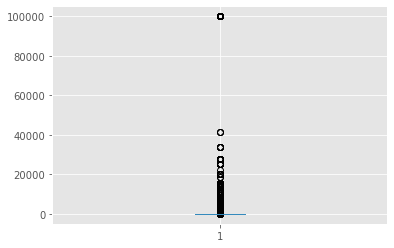

In [1160]:
plt.boxplot(df["capital-gain"])
plt.show()

# Outlier Treatment (IQR)

In [1161]:
print(df['capital-gain'].skew())
Q1=df['capital-gain'].quantile(0.25)
Q3=df['capital-gain'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

df["capital-gain"] = np.where(df["capital-gain"] <Min, 0.0,df['capital-gain'])
df["capital-gain"] = np.where(df["capital-gain"] >Max, 0.0,df['capital-gain'])
print(df['capital-gain'].skew())

11.894658996587946
0


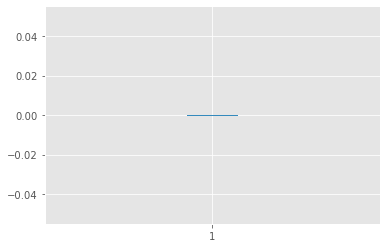

In [1162]:
plt.boxplot(df["capital-gain"])
plt.show()

# Histogram

<AxesSubplot:>

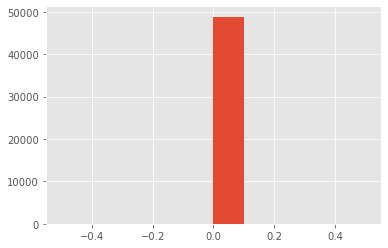

In [1163]:
df['capital-gain'].hist()

In [1164]:
print(df['fnlwgt'].quantile(.10))
print(df['fnlwgt'].quantile(.90))

65738.2
328466.0


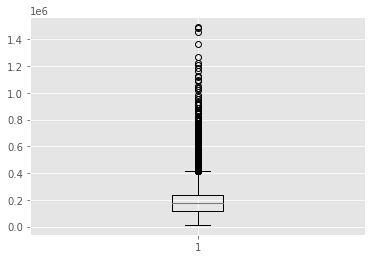

In [1165]:
plt.boxplot(df["fnlwgt"])
plt.show()

In [1166]:
print(df['fnlwgt'].skew())
Q1=df['fnlwgt'].quantile(0.25)
Q3=df['fnlwgt'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

df["fnlwgt"] = np.where(df["fnlwgt"] <Min, 65738.2,df['fnlwgt'])
df["fnlwgt"] = np.where(df["fnlwgt"] >Max, 328466.0,df['fnlwgt'])
print(df['fnlwgt'].skew())

1.4388918785218416
0.36180145681274245


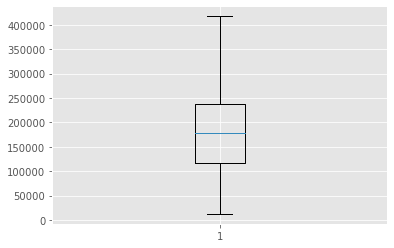

In [1167]:
plt.boxplot(df["fnlwgt"])
plt.show()

<AxesSubplot:>

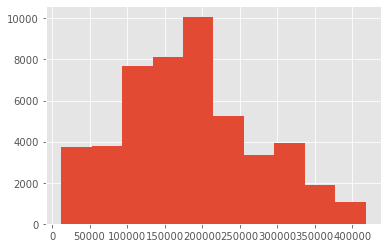

In [1168]:
df.fnlwgt.hist()

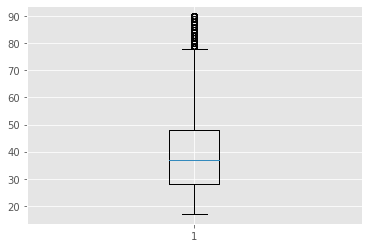

In [1169]:
plt.boxplot(df["age"])
plt.show()

In [1170]:
print(df['age'].quantile(.10))
print(df['age'].quantile(.90))

22.0
58.0


In [1171]:
print(df['age'].skew())
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

df["age"] = np.where(df["age"] <Min, 22.0,df['age'])
df["age"] = np.where(df["age"] >Max, 58.0,df['age'])
print(df['age'].skew())

0.5575803166133181
0.45998478252803365


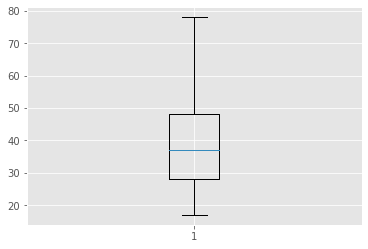

In [1172]:
plt.boxplot(df["age"])
plt.show()

<AxesSubplot:>

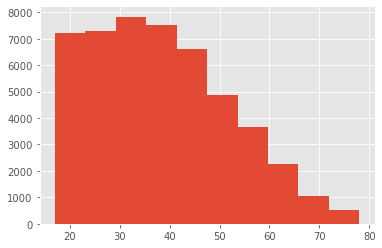

In [1173]:
df.age.hist()

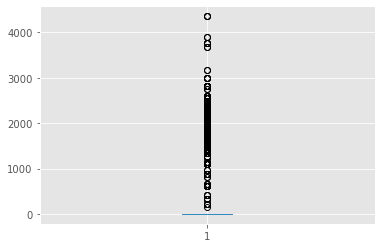

In [1174]:
plt.boxplot(df["capital-loss"])
plt.show()

In [1175]:
print(df['capital-loss'].quantile(.05))
print(df['capital-loss'].quantile(.95))

0.0
0.0


In [1176]:
print(df['capital-loss'].skew())
Q1=df['capital-loss'].quantile(0.25)
Q3=df['capital-loss'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

df["capital-loss"] = np.where(df["capital-loss"] <Min, 0.0,df['capital-loss'])
df["capital-loss"] = np.where(df["capital-loss"] >Max, 0.0,df['capital-loss'])
print(df['capital-loss'].skew())

4.569808857738484
0


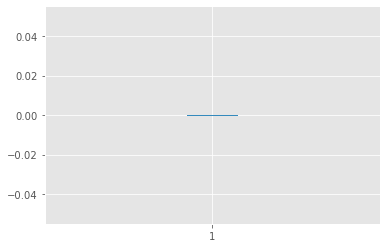

In [1177]:
plt.boxplot(df["capital-loss"])
plt.show()

<AxesSubplot:>

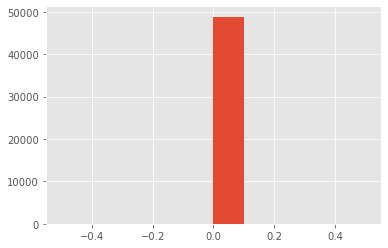

In [1178]:
df['capital-loss'].hist()

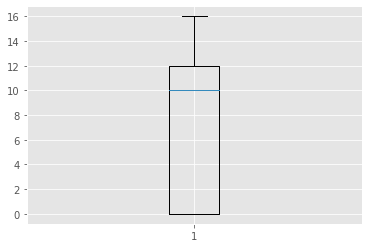

In [1179]:
plt.boxplot(df["educational-num"])
plt.show()

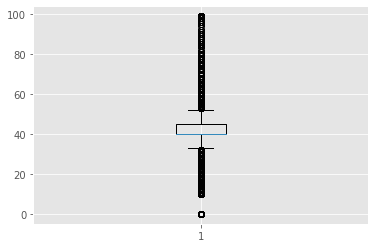

In [1180]:
plt.boxplot(df["hours-per-week"])
plt.show()

In [1181]:
print(df['hours-per-week'].quantile(.10))
print(df['hours-per-week'].quantile(.90))

24.0
55.0


In [1182]:
print(df['hours-per-week'].skew())
Q1=df['hours-per-week'].quantile(0.25)
Q3=df['hours-per-week'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR

df["hours-per-week"] = np.where(df["hours-per-week"] <Min, 24.0,df['hours-per-week'])
df["hours-per-week"] = np.where(df["hours-per-week"] >Max, 55.0,df['hours-per-week'])
print(df['hours-per-week'].skew())

0.07707135514723919
-0.3206984584351093


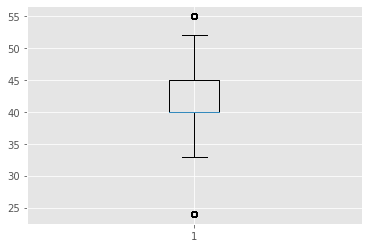

In [1183]:
plt.boxplot(df["hours-per-week"])
plt.show()

In [1184]:
from sklearn import preprocessing
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

<AxesSubplot:title={'center':'original distributions'}, xlabel='fnlwgt', ylabel='Density'>

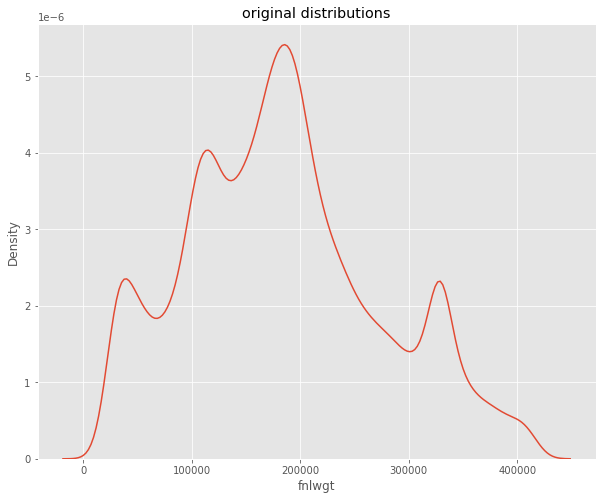

In [1185]:
fig, (ax1)=plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('original distributions')

sns.kdeplot(df['fnlwgt'], ax=ax1)

# Normalization

In [1186]:
col_names = list(df.columns)
mm_scaler = preprocessing.MinMaxScaler()
df = mm_scaler.fit_transform(df)
df = pd.DataFrame(df, columns=col_names)
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.131148,0.529171,0.000,0.0,0.0,0.516129,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.344262,0.191249,0.000,0.0,0.0,0.838710,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.180328,0.800887,0.750,0.0,0.0,0.516129,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.442623,0.365181,0.625,0.0,0.0,0.516129,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.016393,0.225002,0.625,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.163934,0.604409,0.750,0.0,0.0,0.451613,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,0.377049,0.350506,0.000,0.0,0.0,0.516129,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,0.672131,0.344427,0.000,0.0,0.0,0.516129,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.081967,0.466731,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# library for mode ANN

In [1187]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.regularizers import l2


# declare X features and Target (Y)

In [1188]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [1189]:
print(X)

[[0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         0.83870968 ... 0.         1.         0.        ]
 [0.         0.         0.51612903 ... 0.         1.         0.        ]
 ...
 [0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.51612903 ... 0.         1.         0.        ]]


In [1190]:
print(y)

[0. 0. 0. ... 0. 0. 0.]


# Splitting the dataset into the Training set and Test set and validation set

In [1191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [1192]:
print(X_train)

[[0.         0.         0.51612903 ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         1.         0.        ]
 [0.         0.         0.51612903 ... 0.         1.         0.        ]
 ...
 [0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         0.51612903 ... 0.         1.         0.        ]]


In [1193]:
print(X_test)

[[0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         0.38709677 ... 0.         1.         0.        ]
 [0.         0.         0.67741935 ... 0.         1.         0.        ]
 ...
 [0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         1.         ... 0.         1.         0.        ]
 [0.         0.         0.51612903 ... 0.         1.         0.        ]]


In [1194]:
print(y_train)

[0. 0. 0. ... 0. 0. 0.]


In [1195]:
print(y_test)

[0. 0. 0. ... 0. 0. 0.]


In [1196]:
print(X_val)

[[0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         0.83870968 ... 0.         1.         0.        ]
 ...
 [0.         0.         0.51612903 ... 0.         1.         0.        ]
 [0.         0.         1.         ... 0.         1.         0.        ]
 [0.         0.         0.51612903 ... 0.         1.         0.        ]]


In [1197]:
print(y_val)

[0. 0. 0. ... 0. 0. 0.]


# ## Part 2 - Building the ANN

### Initializing the ANN

In [1198]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer and set learning rate to 0.001

In [1199]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
opt = keras.optimizers.Adam(learning_rate=0.001)

#### Adding the second hidden layer  and set regularization to 0.01

In [1200]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
tf.random.set_seed(0)

### Adding the output layer

In [1201]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Part 3 - Training the ANN

### Compiling the ANN and set optimizer to 'adam' and set loss to 'binary_crossentropy'

In [1202]:
ann.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set and calculate loss values and accuracy and set epochs to 100 , batch_size to 32 

In [1203]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_split=0.25)

Epoch 1/100
687/687 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9960 - val_loss: 0.0140 - val_accuracy: 0.9996
Epoch 2/100
687/687 [==============================] - 1s 2ms/step - loss: 0.0090 - accuracy: 0.9995 - val_loss: 0.0061 - val_accuracy: 0.9996
Epoch 3/100
687/687 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.0049 - val_accuracy: 0.9996
Epoch 4/100
687/687 [==============================] - 1s 2ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.0043 - val_accuracy: 0.9996
Epoch 5/100
687/687 [==============================] - 1s 2ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch 6/100
687/687 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9996
Epoch 7/100
687/687 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0036 - val_accuracy: 0.9996

Epoch 57/100
687/687 [==============================] - 1s 2ms/step - loss: 4.8627e-04 - accuracy: 0.9999 - val_loss: 0.0060 - val_accuracy: 0.9989
Epoch 58/100
687/687 [==============================] - 1s 2ms/step - loss: 5.9281e-04 - accuracy: 0.9998 - val_loss: 0.0084 - val_accuracy: 0.9993
Epoch 59/100
687/687 [==============================] - 1s 2ms/step - loss: 5.1136e-04 - accuracy: 0.9999 - val_loss: 0.0117 - val_accuracy: 0.9995
Epoch 60/100
687/687 [==============================] - 1s 2ms/step - loss: 5.5027e-04 - accuracy: 0.9999 - val_loss: 0.0139 - val_accuracy: 0.9995
Epoch 61/100
687/687 [==============================] - 1s 2ms/step - loss: 5.9403e-04 - accuracy: 0.9998 - val_loss: 0.0131 - val_accuracy: 0.9995
Epoch 62/100
687/687 [==============================] - 1s 2ms/step - loss: 5.8402e-04 - accuracy: 0.9998 - val_loss: 0.0094 - val_accuracy: 0.9995
Epoch 63/100
687/687 [==============================] - 1s 2ms/step - loss: 5.2430e-04 - accuracy: 0.9999 - val_

### loss curve for train and validation

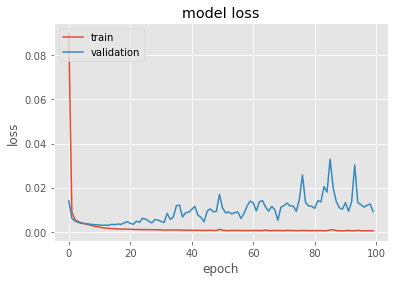

In [1204]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### number of samples used in training

In [1205]:
len(X_train)

29304

### number of samples used in testing

In [1206]:
len(X_test)

9769

### number of samples used in validation

In [1207]:
len(X_val)

9769

### predict the target 

In [1208]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### calculate confusion matrix and accuracy

In [1209]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9761    5]
 [   3    0]]


0.999181083017709

### ROC curve

In [1210]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [1211]:
y_pred = ann.predict(X_test).ravel()
y_pred

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8299449e-36,
       0.0000000e+00, 4.6035815e-26], dtype=float32)

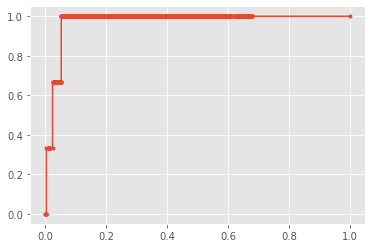

In [1212]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)